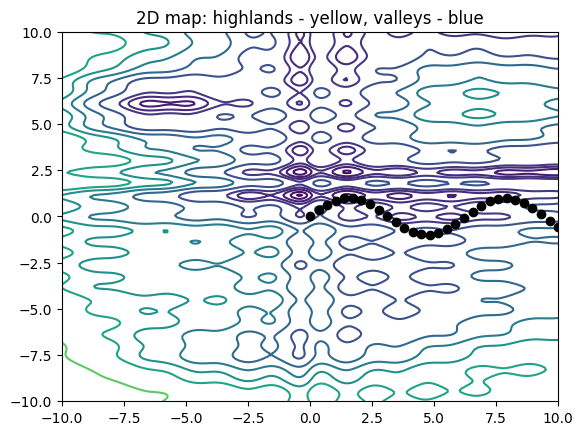

In [105]:
"""
 2-D function drawing with points

"""
import numpy as np
import math
import matplotlib.pyplot as plt

def fun3(x1,x2):
    eps = 0.00000001
    R1 = np.sqrt(0.3*(x1+3)**2 + (x2+4)**2 + eps)
    R2 = np.sqrt(0.2*(x1-7)**2 + (x2-6)**2 + eps)
    R3 = np.sqrt(0.2*(x1-7)**2 + 0.5*(x2-6)**2 + eps)
    R4 = np.sqrt(0.7*(x1+7)**2 + 2*(x2-6)**2 + eps)
    R5 = np.sqrt(0.2*(x1+3)**2 + 0.05*(x2+5)**4 + eps)

    y = np.sin(x1*3)/(abs(x1)+1) + np.sin(x2*5-1)/(abs(x2/2-1)+1) + ((x1-5)**2+(x2-5)**2)/50 + \
        4*np.sin(R1)/R1 + 4*np.sin(R2)/R2 - 3*np.sin(R4)/R4 - 3*np.sin(R5)/R5
    return y

def draw_map():
    X1, X2 = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
    Z = fun3(X1,X2)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    cs = plt.contour(X1,X2,Z, levels=[-2.0, -1.8, -1.5, -1, -0.5, 0, 1, 2, 3, 4, 5,7,10])
    #fig,ax = plt.subplots()
    #CS = ax.contour(X1,X2,Z, levels=[-2.0, -1.8, -1.5, -1, -0.5, 0, 1, 2, 3, 4, 5,7,10])
    #ax.clabel(CS, inline=True, fontsize=10)

def show_fun():

    draw_map()
    x = np.linspace(0, 10, 30)
    y = np.sin(x)
    plt.plot(x, y, 'o', color='black');
    plt.title('2D map: highlands - yellow, valleys - blue')
    plt.show()

def show_point_sequence(Points,title):
    draw_map()
    plt.plot(Points[:,0], Points[:,1], '', color='blue');
    plt.plot(Points[:,0], Points[:,1], 'o', color='blue',markersize=12,linewidth=2);
    plt.plot(Points[-1,0], Points[-1, 1], '+', color='red', markersize=20, linewidth=3);
    plt.title(title)
    plt.show()

def show_the_point(x,title):
    draw_map()
    plt.plot(x[0], x[1], '+', color='red', markersize=12, linewidth=2);
    plt.title(title)
    plt.show()


show_fun()


In [479]:
num_of_steps = 2000     # number of steps: do not change
num_of_parameters = 2   # number of solution parameters
N = num_of_parameters

T = 400.0                # Initial temperature (randomness coefficient)
T_min = 0.000001          # Minimum temperature
wT = 0.995               # Cooling factor: change of temperature
c = 0.15                 # Constant affecting acceptance probability

best_solutions = []     # Store best solutions from each run

for run in range(5):    # Run the algorithm 5 times

    Solution = np.random.rand(N) * 20 - 10    # initial solution - random point

    E_min = 10e40                             # minimal function value
    E_prev = 0                                # previous function value
    Records = np.empty((0, N))                # array of record solutions

    # show_the_point(Solution, "Initial solution (Run " + str(run + 1) + ")")

    T = 400.0                                  # temperature for each run

    for ep in range(num_of_steps):

        SolutionNew = Solution + np.random.randn(N) * (T / 7.5) * (1 + 0.3 * np.exp(-ep/350)) # new solution (should be near previous one !)
        E = fun3(SolutionNew[0],SolutionNew[1])                                       # function value for point coordinates
        dE = E - E_prev                                                               # change of function value (dE < 0 means than new solution is better)
        p_accept = min(1, math.exp(-dE / (c * (T + 1e-8))))                           # acceptance probability

        if np.random.rand() < p_accept:
            Solution = SolutionNew
            E_prev = E

        if E < E_min:
            # print(f"New minimum = {E:.6f} at x1 = {SolutionNew[0]:.6f}, x2 = {SolutionNew[1]:.6f}")
            E_min = E
            Solution_min = SolutionNew
            Records = np.append(Records, [SolutionNew], axis=0)

        T *= wT       # temperature changing (can be only after accaptance or in another place)
        if T < T_min:
            T = T_min

    best_solutions.append((E_min, Solution_min[0], Solution_min[1]))

    # text = f"Best solution, value = {E_min:.6f} at x1 = {Solution_min[0]:.6f}, x2 = {Solution_min[1]:.6f}"
    # print(text)
    # show_point_sequence(Records, "Record sequence, " + text)

# Print summary of all runs
print("\nSummary of all runs:")
for i, (E_min, x1, x2) in enumerate(best_solutions):
    print(f"Run {i + 1}: Best value = {E_min:.6f} at x1 = {x1:.6f}, x2 = {x2:.6f}")



Summary of all runs:
Run 1: Best value = -1.801391 at x1 = -0.322314, x2 = 1.143511
Run 2: Best value = -1.690535 at x1 = -0.249637, x2 = 1.210937
Run 3: Best value = -1.705504 at x1 = -0.434386, x2 = 2.454713
Run 4: Best value = -1.759741 at x1 = -0.500380, x2 = 1.224199
Run 5: Best value = -1.148654 at x1 = -6.417673, x2 = 6.100831
